In [88]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrugFile = pd.read_csv(mouse_drug_data_to_load)
clinTriFile = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseClinDF = pd.merge(clinTriFile, mouseDrugFile, on="Mouse ID")

# Display the data table for preview
mouseClinDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [89]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumVol = mouseClinDF.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
meanDF = pd.DataFrame(meanTumVol)
meanDF = meanDF.drop("Metastatic Sites", axis=1)

# Preview DataFrame
meanDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [90]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semTumVol = mouseClinDF.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
semDF = pd.DataFrame(semTumVol)
semDF = semDF.drop("Metastatic Sites", axis=1)
semDF = semDF.drop("Mouse ID", axis=1)

# Preview DataFrame
semDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [91]:
# Minor Data Munging to Re-Format the Data Frames
meanDF = meanDF.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
semDF = semDF.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
meanDF.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


ValueError: shape mismatch: objects cannot be broadcast to a single shape

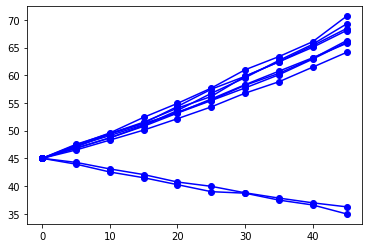

In [92]:
# Generate the Plot (with Error Bars)
xAxis = meanDF.index
meanAxis = meanDF.iloc[:, :]
semAxis = semDF.iloc[:, :]
meanHanlde = plt.plot(xAxis, meanAxis, marker ='o', color='blue', label="Mean")
plt.errorbar(xAxis, meanAxis, yerr=semAxis, marker ='o', color='blue', alpha=0.5, label="Mean")
# Save the Figure
plt.savefig("Images/meanAndStdDev.png")